# Pandas

Download the dataset.tsv file from the canvas.
### 1. Import the libraries

In [336]:
import pandas as pd

### 2. Import the dataset

In [337]:
data = pd.read_csv('dataset.tsv', sep="\t")

### 3. Print the first 50 entries

In [338]:
pd.read_csv('dataset.tsv', sep="\t", nrows=50)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 4. Print the number of datapoints (rows) in the dataset?

In [339]:
f"{data.shape[0]} rows"

'4622 rows'

### 5. Print the number of columns in the dataset?

In [340]:
f"{data.shape[1]} columns"

'5 columns'

###  7. Print the names of columns.

In [341]:
for el in data.columns:
    print(el)

order_id
quantity
item_name
choice_description
item_price


### 8. Print the most ordered product and it's count?

In [342]:
data['item_name'].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

### 9. Print the number of products ordered?

In [343]:
# Assuming i'm supposed to find number of different kinds of products ordered
f"Number of products ordered: {len(data['item_name'].value_counts())}"

'Number of products ordered: 50'

### 10. Print the most ordered product in the option_description column?

In [344]:
data['choice_description'].value_counts()[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

### 11. Print the number of products orderd in total?

In [345]:
f"Products ordered in total: {data['quantity'].sum()}"

'Products ordered in total: 4972'

### 12. Cast the product price to float type

In [346]:
for i, el in enumerate(data['item_price']):
    data['item_price'][i] = float(el.split("$")[1])

data['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: object

### 13. Print the quantity of the costliest product ordered?


In [347]:
max_quant = data['item_price'].value_counts().sort_index(ascending=False)
print("Cost: $", max_quant.index[0], sep="")
print("Quantity", max_quant.values[0])

Cost: $44.25
Quantity 1


### 14. What was the revenue for the whole period in the dataset?

In [348]:
f"Revenue for the whole period: ${round(data['item_price'].sum(), 2)}"

'Revenue for the whole period: $34500.16'

### 15. Print the total no of orders in the whole period?

In [349]:
f"Total number of orders: {len(data['order_id'].value_counts())}"

'Total number of orders: 1834'

### 16. Print the average price per order?

In [350]:
current_ordernum = 0
current_order_cost = 0
price_list = []
for i, el in enumerate(data['order_id']):
    if el == current_ordernum:
        current_order_cost += data['item_price'][i]
    else:
        if current_ordernum != 0: price_list.append(current_order_cost)
        current_ordernum = el
        current_order_cost = data['item_price'][i]

f"Average price per order: ${round(sum(price_list)/len(price_list), 2)}"

'Average price per order: $18.81'

### 17. How many unique products were sold?

In [351]:
f"Unique products: {len(data['choice_description'].value_counts())}"

'Unique products: 1043'

### 18. Print the number of time Veggie Burrito was ordered?

In [352]:
for el in data['item_name'].value_counts().iteritems():
    if el[0] == 'Veggie Burrito':
        print(f"The Veggie Burrito was ordered {el[1]} times")
        break

The Veggie Burrito was ordered 95 times


### 19. Print the products cost more than $20.00?


In [353]:
above20 = set()
for el in data['item_price'].iteritems():
    if el[1] > 20:
        above20.add(data['item_name'][el[0]])
for el in above20:
    print(el)

Chicken Burrito
Chicken Soft Tacos
Steak Salad Bowl
Veggie Burrito
Bowl
Steak Burrito
Carnitas Bowl
Chicken Bowl
Steak Bowl
Chicken Salad Bowl
Chips and Fresh Tomato Salsa


### 20. Plot a histogram for the prices of top 7 products bought

Text(0, 0.5, 'Frequency')

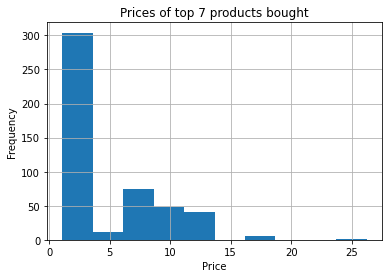

In [379]:
top7 = data['choice_description'].value_counts()[0:7].index
hist_data = []
for i, el in enumerate(data['choice_description']):
    for inner in top7:
        if el == inner:
            hist_data.append(data['item_price'][i])

plot = pd.DataFrame({'Prices of top 7 products bought':hist_data}).hist()
label = plot[0][0]
label.set_xlabel('Price')
label.set_ylabel('Frequency')

### 21. Draw a scatterplot with the number of products orderered per transaction price
#### Tips: Price should be in the X-axis and products ordered in the Y-axis

<AxesSubplot:xlabel='Price', ylabel='Products Ordered'>

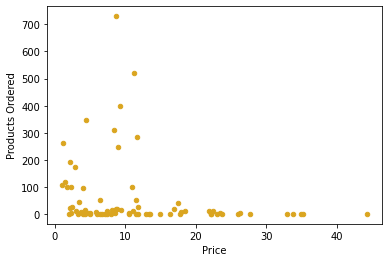

In [355]:
prices = [list(x) for x in data['item_price'].value_counts().iteritems()]
df = pd.DataFrame(prices, columns=['Price', 'Products Ordered'])
df.plot.scatter(x='Price', y='Products Ordered', c='goldenrod')